##  1. Comprensión del Negocio

**Objetivo general:**
Apoyar la toma de decisiones clínicas mediante el análisis de datos de pacientes con cáncer de pulmón.

**Subobjetivos específicos:**
1. Predecir los meses de supervivencia del paciente (`Survival_Months`)
2. Clasificar el estado del cáncer (`Stage`) a partir de datos clínicos
3. Evaluar el riesgo del paciente (alto/bajo) con base en biomarcadores

**Impacto esperado:**
- Mejorar el pronóstico de pacientes
- Apoyar la personalización del tratamiento
- Identificar factores de riesgo temprano

---

##  2. Comprensión de los Datos

**Acciones:**
- Cargar el dataset y revisar su estructura (`df.info()`)
- Explorar la distribución de la variable objetivo (`Survival_Months`)
- Analizar variables categóricas y numéricas
- Detectar correlaciones, outliers y posibles errores

**Herramientas utilizadas:**
- `pandas`, `matplotlib`, `seaborn`

---

##  3. Preparación de los Datos

**Pasos clave:**
- Codificar variables categóricas con **One-Hot Encoding** (`pd.get_dummies`)
- Escalar variables numéricas con **StandardScaler**
- Eliminar columnas irrelevantes (por ejemplo, `Patient_ID`)
- Crear variable binaria `High_Risk` o `Survival_Class` si se usa clasificación
- Dividir los datos en conjuntos de entrenamiento y prueba (`train_test_split`)

---

##  4. Modelado

### A. Modelo de Regresión
- **Objetivo:** Predecir `Survival_Months`
- **Algoritmos sugeridos:**
  - Regresión Lineal
  - Random Forest Regressor
  - XGBoost Regressor
- **Métricas:** MAE, MSE, R²

### B. Clasificación del Estado del Cáncer
- **Objetivo:** Predecir `Stage`
- **Algoritmos:**
  - Random Forest Classifier
  - SVM (Support Vector Machine)
  - k-NN (K-Nearest Neighbors)
- **Métricas:** Accuracy, Precision, Recall, F1-Score


###  Validación cruzada:
Usar `cross_val_score` o `GridSearchCV` para comparar y ajustar hiperparámetros automáticamente.

---

##  5. Evaluación

**Acciones:**
- Comparar resultados de los modelos
- Analizar errores y precisión
- Validar interpretabilidad (por ejemplo, `feature importance`)
- Generar visualizaciones:
  - Matriz de confusión
  - Curva ROC (para clasificación)
  - Gráficos de predicción vs. valores reales (para regresión)

---

##  6. (Omitido) Deployment

En este proyecto académico no se hará despliegue real, pero se puede sugerir:

> “En una aplicación real, este modelo se integraría en un sistema hospitalario para alertar sobre pacientes de alto riesgo.”

---

##  7. Conclusiones y Recomendaciones


- Factores más influyentes en la supervivencia
- Modelos con mejor desempeño
- Limitaciones del dataset (por ejemplo, que es sintético)
- Posibles mejoras: agregar historial longitudinal, exámenes adicionales, más variables clínicas, etc.


## 2 Comprensión de los Datos

En esta fase se busca entender la estructura del dataset, identificar patrones generales, posibles problemas en los datos y preparar el terreno para la limpieza y modelado.

# Estructura general del DataFrame
df.info()
df.head()

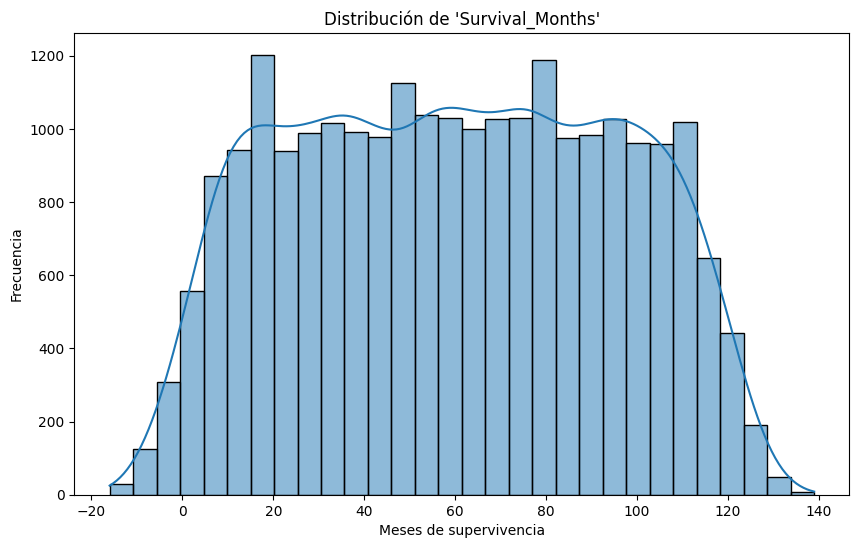

count    23658.000000
mean        59.826232
std         34.978471
min        -16.000000
25%         30.000000
50%         60.000000
75%         89.000000
max        139.000000
Name: Survival_Months, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("lung_cancer_data.csv")
plt.figure(figsize=(10,6))
sns.histplot(df['Survival_Months'], bins=30, kde=True)
plt.title("Distribución de 'Survival_Months'")
plt.xlabel("Meses de supervivencia")
plt.ylabel("Frecuencia")
plt.show()

# Estadísticas generales
print(df['Survival_Months'].describe())

In [52]:
df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,67,Male,Former Smoker,76.962721,Lower Lobe,Stage II,Chemotherapy,58,Hispanic,...,27.542249,48.827429,1.136666,240.228355,10.404316,3.485301,112.282732,4.836356,140.685366,25.286420
1,Patient0001,65,Female,Current Smoker,79.361875,Hilar Region,Stage I,Targeted Therapy,100,Asian,...,27.663543,42.268410,1.351890,241.724131,9.955184,3.053094,106.372123,3.951845,134.958045,94.770116
2,Patient0002,43,Female,Former Smoker,68.643237,Hilar Region,Stage III,Chemotherapy,75,Caucasian,...,3.821291,28.199662,0.726740,169.546315,8.648093,4.746591,81.872266,4.338813,142.922957,58.139640
3,Patient0003,71,Male,Former Smoker,70.260370,Upper Lobe,Stage II,Immunotherapy,87,Hispanic,...,40.062975,42.076584,0.616197,209.522457,9.048978,3.664020,123.679469,4.423109,137.392600,8.602211
4,Patient0004,32,Male,Unknown,82.751333,Peripheral,Stage II,Surgery,119,Hispanic,...,22.841558,15.534637,1.405836,132.775482,9.082525,4.797236,144.241142,3.589332,141.324413,79.792332


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_History                    23658 non-null  object 
 12  Como

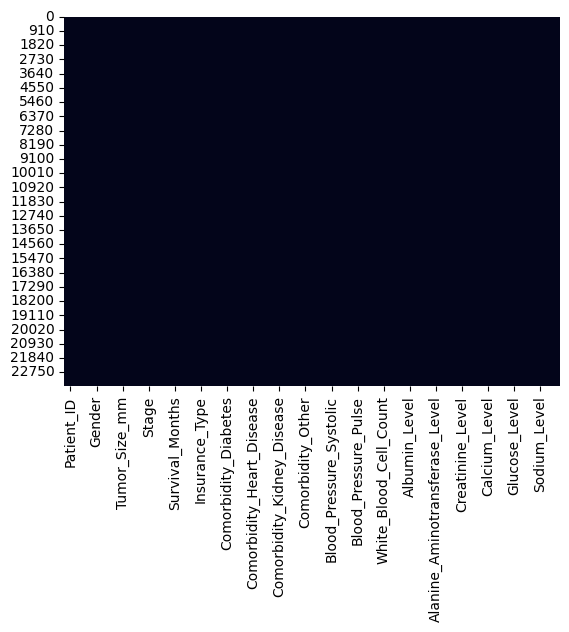

In [54]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

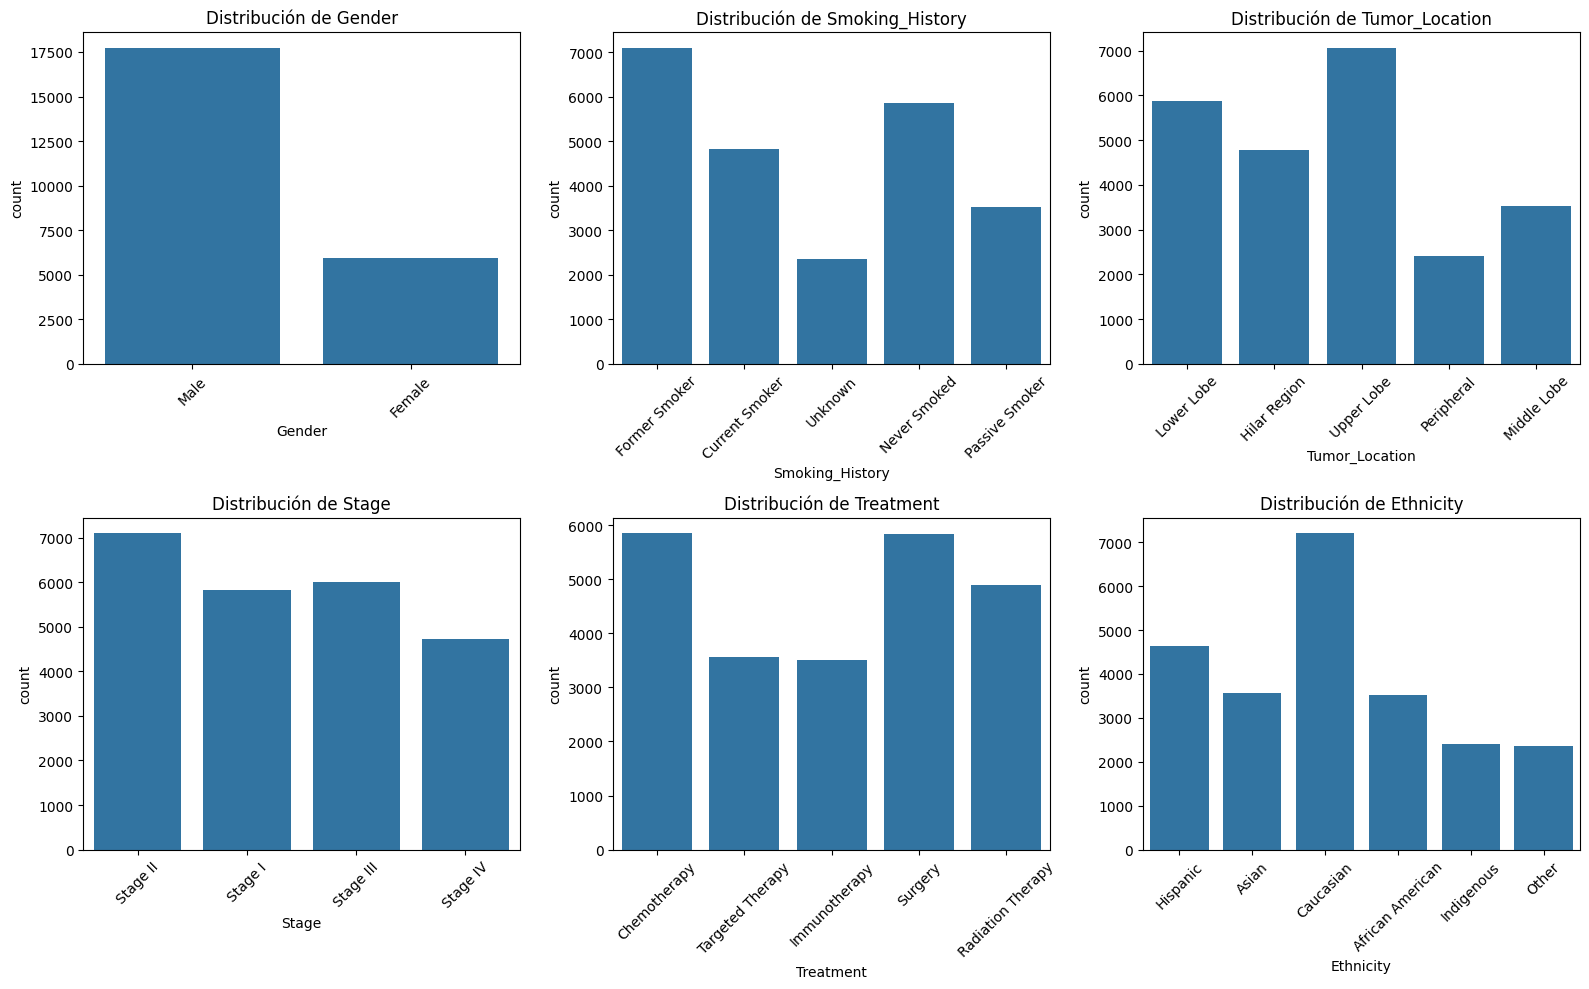

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

categoricas = ['Gender', 'Smoking_History', 'Tumor_Location', 'Stage', 'Treatment', 'Ethnicity']
n = len(categoricas)

# Calculamos número de filas y columnas para los subplots
ncols = 3
nrows = (n + ncols - 1) // ncols  # Redondeo hacia arriba

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 10))
axes = axes.flatten()  # Aplanamos para indexar fácilmente

for i, col in enumerate(categoricas):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Si hay ejes vacíos (cuando nrows * ncols > len(categoricas)), los apagamos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



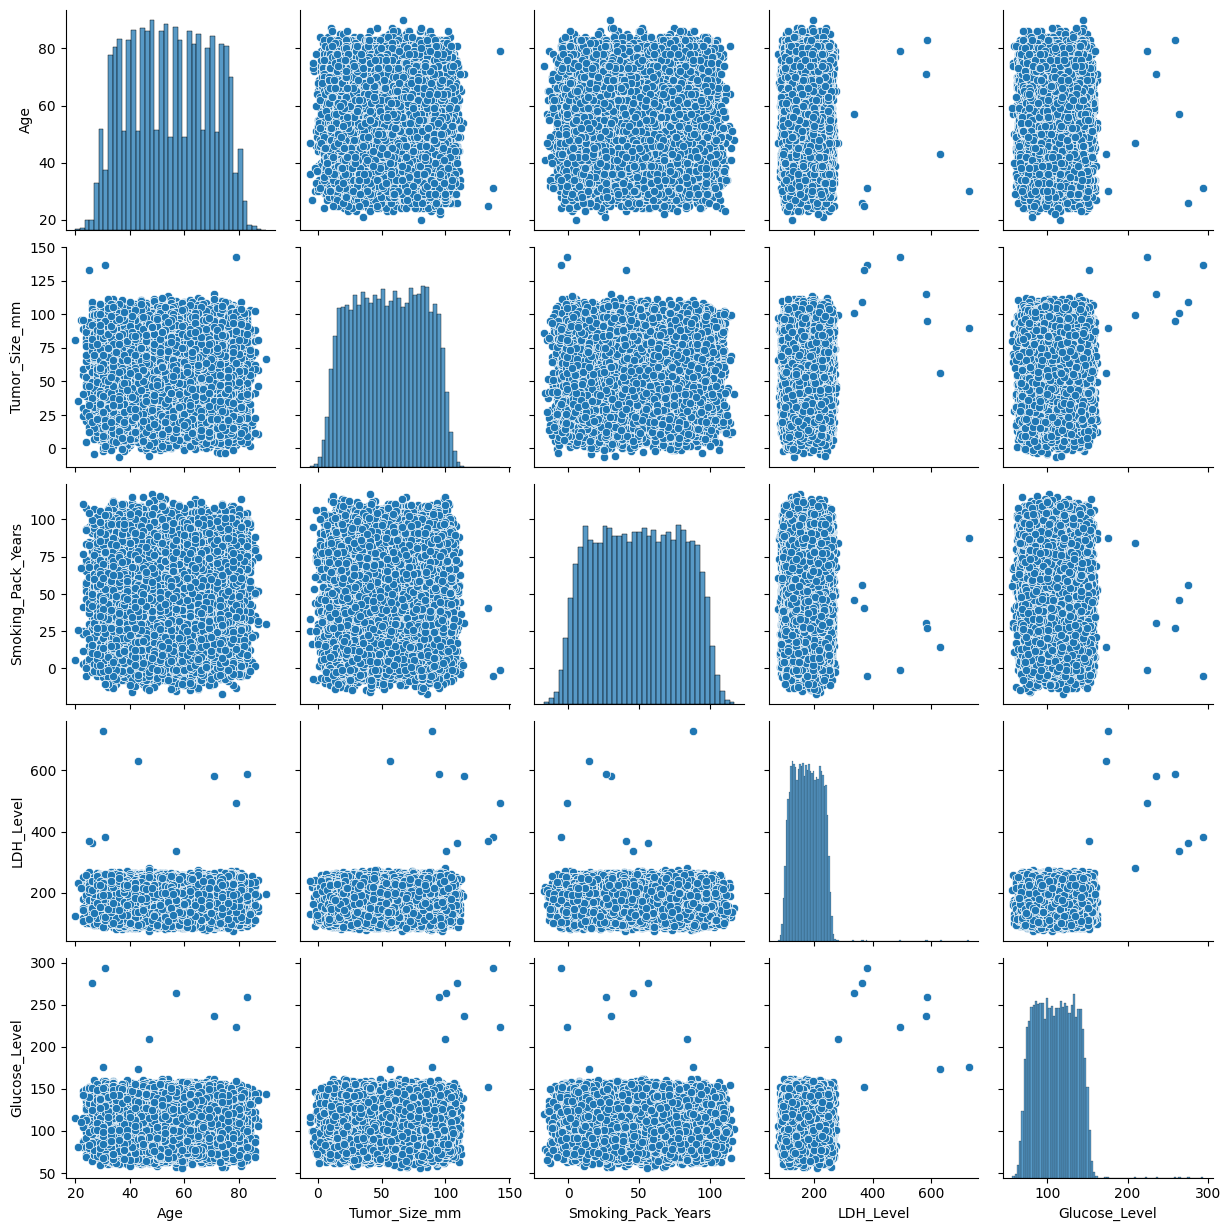

In [56]:
numericas = ['Age', 'Tumor_Size_mm', 'Smoking_Pack_Years', 'LDH_Level', 'Glucose_Level']

df[numericas].describe()

# Pairplot para ver correlaciones visuales
sns.pairplot(df[numericas])
plt.show()


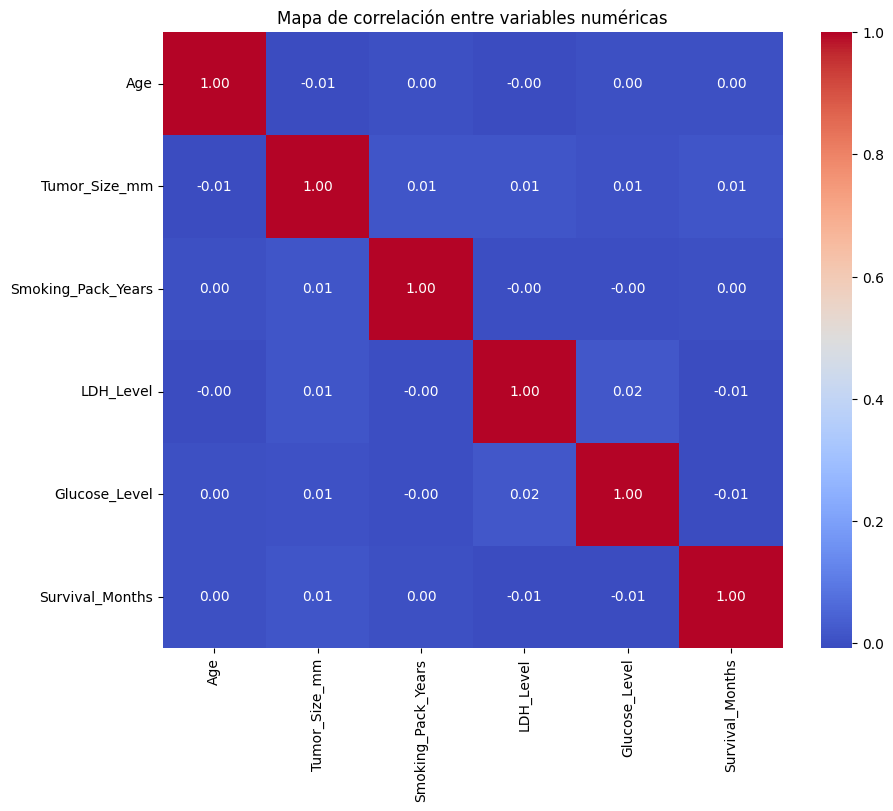

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numericas + ['Survival_Months']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()


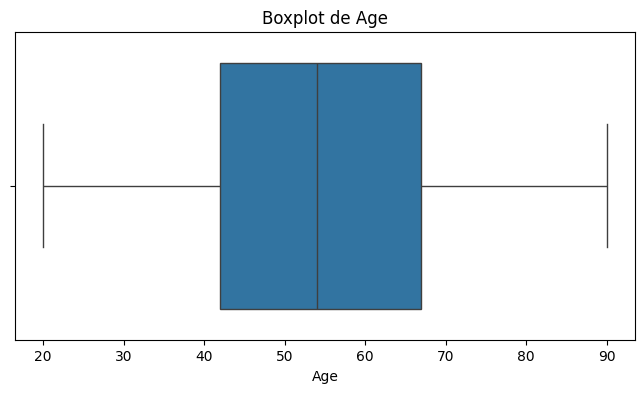

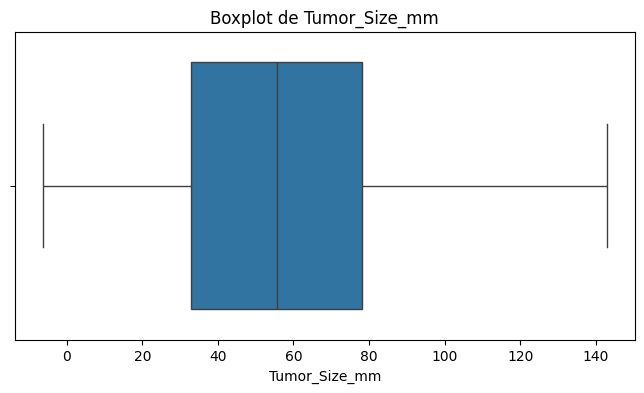

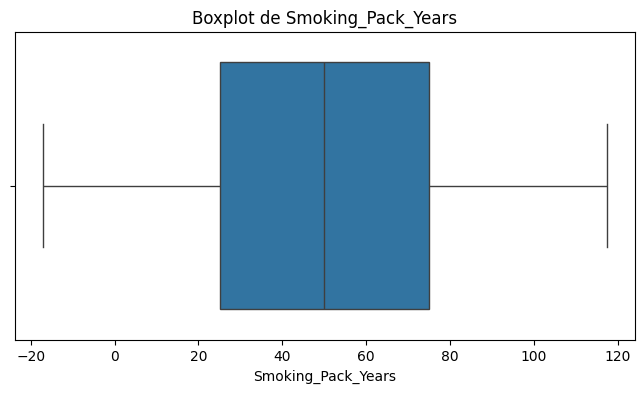

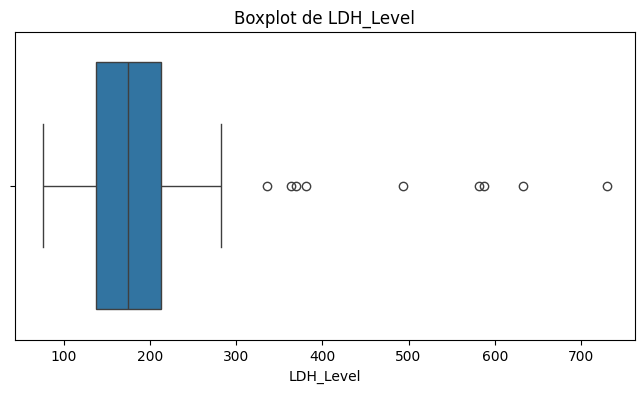

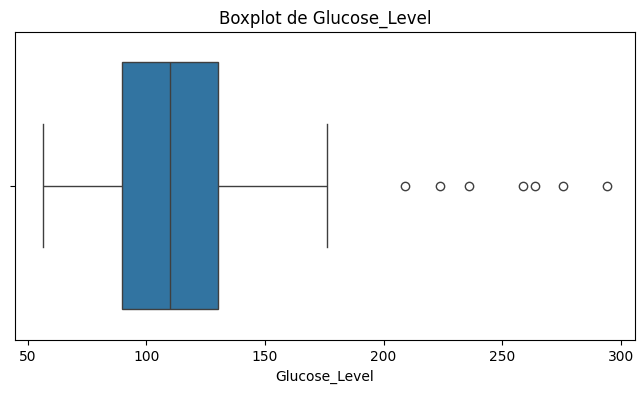

In [58]:
for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de {col}")
    plt.show()


##  3. Preparación de los Datos

En esta fase se preparan los datos para aplicar modelos de Machine Learning, asegurando que todas las variables estén en un formato adecuado y optimizado.

---

###  1. Codificación de variables categóricas

Se utilizaron variables como `Gender`, `Smoking_History`, `Tumor_Location`, `Stage`, `Treatment`, `Ethnicity`, 
que son categóricas. Para poder utilizarlas en modelos, se aplicó **One-Hot Encoding**.

## Dividir los datos en conjuntos de entrenamiento y prueba
- A. Modelo de Regresión

- B. Clasificación del Estado del Cáncer


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copia del dataset original
df_ml = df.copy()

# 1. Eliminar columnas irrelevantes
df_ml.drop(columns=['Patient_ID'], inplace=True)

# 2. Codificar variables categóricas con One-Hot Encoding
columnas_categoricas = [
    'Gender', 'Smoking_History', 'Tumor_Location', 'Treatment',
    'Ethnicity', 'Insurance_Type', 'Family_History',
    'Comorbidity_Diabetes', 'Comorbidity_Hypertension',
    'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease',
    'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease',
    'Comorbidity_Other'
]

df_ml = pd.get_dummies(df_ml, columns=columnas_categoricas, drop_first=True)

# 3. Escalar variables numéricas
escalador = StandardScaler()

# Excluir la variable objetivo de regresión y la columna 'Stage' (usada como y_clf)
columnas_numericas = df_ml.select_dtypes(include=['int64', 'float64']).drop(columns=['Survival_Months']).columns

df_ml[columnas_numericas] = escalador.fit_transform(df_ml[columnas_numericas])

# ----------------------------------------------------------------------------
# 🔵 Preparar datos para la Parte A: Regresión (Supervivencia en meses)
# ----------------------------------------------------------------------------
X_reg = df_ml.drop(columns=['Survival_Months', 'Stage'])  # 'Stage' se usará como variable para clasificación
y_reg = df_ml['Survival_Months']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# ----------------------------------------------------------------------------
# 🟢 Preparar datos para la Parte B: Clasificación del Stage
# ----------------------------------------------------------------------------
X_clf = df_ml.drop(columns=['Survival_Months', 'Stage'])  # Usamos el mismo X
y_clf = df['Stage']  # Se conserva como texto para clasificación multiclase

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)


## Parte A: Regresión – Predicción de Supervivencia

### Objetivo:
Predecir la cantidad de meses que un paciente con cáncer de pulmón puede sobrevivir (`Survival_Months`), utilizando variables clínicas, demográficas, biomarcadores y factores de estilo de vida.

El valor a predecir es una variable continua que representa el tiempo de supervivencia en meses desde el diagnóstico o el tratamiento.

---

### Modelos de regresión utilizados:

- **Regresión Lineal**
- **Random Forest Regressor**
- **XGBoost Regressor**

---

### Métricas de evaluación:

Para evaluar el rendimiento de los modelos de regresión se utilizaron las siguientes métricas:

- **MAE (Mean Absolute Error)**: error promedio absoluto entre predicciones y valores reales.
- **MSE (Mean Squared Error)**: penaliza más los errores grandes al elevarlos al cuadrado.
- **R² (Coeficiente de Determinación)**: indica qué proporción de la varianza de la variable objetivo es explicada por el modelo.


C:\Users\HARRISON\AppData\Local\Temp\ipykernel_17544\2867335283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y='Survival_Months', palette='Set3')


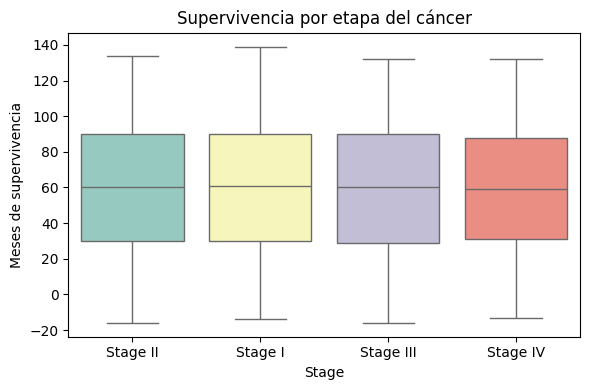

In [61]:
# Boxplots por etapa del cáncer (Stage vs. Survival_Months)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Stage', y='Survival_Months', palette='Set3')
plt.title('Supervivencia por etapa del cáncer')
plt.xlabel('Stage')
plt.ylabel('Meses de supervivencia')
plt.tight_layout()
plt.show()

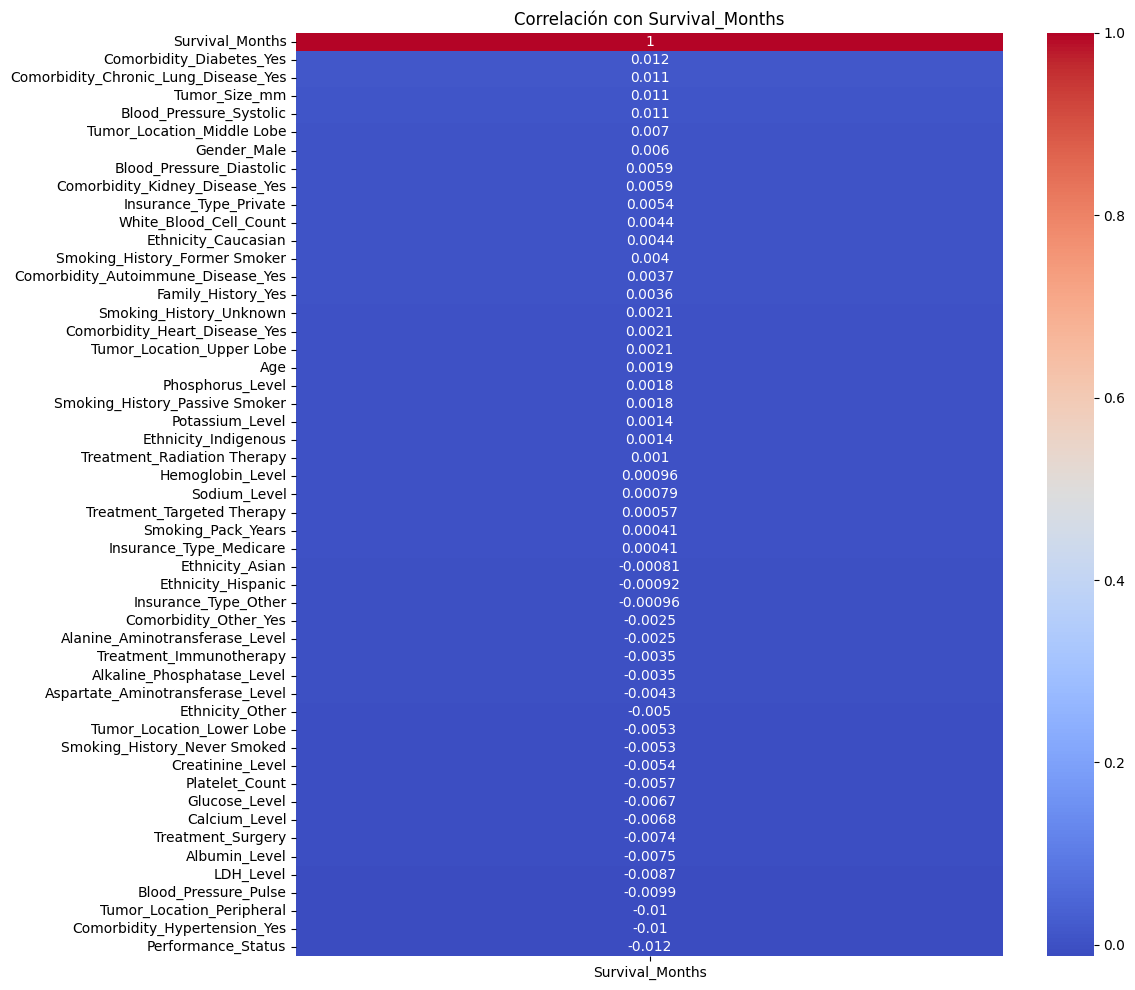

In [62]:
# Correlación solo de columnas numéricas
corr = df_ml.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr[['Survival_Months']].sort_values(by='Survival_Months', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlación con Survival_Months')
plt.tight_layout()
plt.show()


In [47]:
df_ml.head()

,Age,Tumor_Size_mm,Stage,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,...,Insurance_Type_Other,Insurance_Type_Private,Family_History_Yes,Comorbidity_Diabetes_Yes,Comorbidity_Hypertension_Yes,Comorbidity_Heart_Disease_Yes,Comorbidity_Chronic_Lung_Disease_Yes,Comorbidity_Kidney_Disease_Yes,Comorbidity_Autoimmune_Disease_Yes,Comorbidity_Other_Yes
0,0.850247,0.812590,Stage IV,58,0.707451,1.019895,1.007960,1.075197,-0.200810,1.631005,...,False,False,False,True,True,True,False,True,True,True
1,0.714441,0.902861,Stage IIIB,100,1.414842,-1.286028,0.452771,1.161803,1.216747,-1.254334,...,False,True,True,True,True,False,False,True,True,False
2,-0.779422,0.499561,Stage I,75,-1.414722,-0.978572,-0.727004,0.122523,0.205685,-0.307487,...,True,False,True,False,False,False,True,True,False,False
3,1.121859,0.560407,Stage 0,87,-0.707331,-1.209164,0.036380,-1.003365,1.495604,-0.253427,...,False,False,True,True,False,True,False,True,True,False
4,-1.526354,1.030393,Stage I,119,-1.414722,1.173624,-1.073997,1.681444,-0.197694,-0.815282,...,False,False,False,True,True,True,False,True,False,False


In [64]:
print(df_ml.columns)


Index(['Age', 'Tumor_Size_mm', 'Stage', 'Survival_Months',
       'Performance_Status', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
       'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
       'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
       'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
       'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
       'Sodium_Level', 'Smoking_Pack_Years', 'Gender_Male',
       'Smoking_History_Former Smoker', 'Smoking_History_Never Smoked',
       'Smoking_History_Passive Smoker', 'Smoking_History_Unknown',
       'Tumor_Location_Lower Lobe', 'Tumor_Location_Middle Lobe',
       'Tumor_Location_Peripheral', 'Tumor_Location_Upper Lobe',
       'Treatment_Immunotherapy', 'Treatment_Radiation Therapy',
       'Treatment_Surgery', 'Treatment_Targeted Therapy', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnici

In [65]:
columnas_categoricas = [
    'Age', 'Tumor_Size_mm', 'Stage', 'Survival_Months',
       'Performance_Status', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
       'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
       'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
       'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
       'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
       'Sodium_Level', 'Smoking_Pack_Years', 'Gender_Male',
       'Smoking_History_Former Smoker', 'Smoking_History_Never Smoked',
       'Smoking_History_Passive Smoker', 'Smoking_History_Unknown',
       'Tumor_Location_Lower Lobe', 'Tumor_Location_Middle Lobe',
       'Tumor_Location_Peripheral', 'Tumor_Location_Upper Lobe',
       'Treatment_Immunotherapy', 'Treatment_Radiation Therapy',
       'Treatment_Surgery', 'Treatment_Targeted Therapy', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic', 'Ethnicity_Indigenous',
       'Ethnicity_Other', 'Insurance_Type_Medicare', 'Insurance_Type_Other',
       'Insurance_Type_Private', 'Family_History_Yes',
       'Comorbidity_Diabetes_Yes', 'Comorbidity_Hypertension_Yes',
       'Comorbidity_Heart_Disease_Yes', 'Comorbidity_Chronic_Lung_Disease_Yes',
       'Comorbidity_Kidney_Disease_Yes', 'Comorbidity_Autoimmune_Disease_Yes',
       'Comorbidity_Other_Yes'
]

for col in columnas_categoricas:
    print(f"\nValores únicos en '{col}':")
    print(df_ml[col].unique())



Valores únicos en 'Age':
[ 0.85024709  0.7144413  -0.77942235  1.12185866 -1.52635417 -0.2361992
  0.98605288 -0.10039341 -0.16829631 -1.18683971 -1.32264549 -0.03249052
  0.64653841 -0.37200499 -1.45845128  1.25766445  0.03541237 -1.66215996
 -0.43990788  0.57863552 -0.98313103  1.32556734  0.10331527  1.66508181
  0.23912105  0.51073262 -0.84732524 -0.57571367  1.05395577  1.7329847
 -1.2547426   0.37492684  1.59717892 -1.11893681  0.91814998  1.8008876
 -1.79796575 -0.91522813  0.17121816 -0.30410209  1.46137313  0.7823442
  0.30702395 -0.64361656 -0.50781077  1.18976156 -1.73006285 -1.05103392
 -1.39054839  0.44282973 -1.93377153  1.52927602 -1.59425707  1.39347024
 -1.86586864 -0.71151945  1.86879049 -2.00167443  2.00459628 -2.13748021
  1.93669338 -2.34118889  2.20830496  2.07249917 -2.06957732  2.14040206
  2.41201364 -2.273286   -2.20538311]

Valores únicos en 'Tumor_Size_mm':
[ 0.81259017  0.90286088  0.49956078 ...  1.08860925 -0.59742053
 -1.56535591]

Valores únicos en 'St

⏳ Evaluando Linear Regression...
⏳ Evaluando Random Forest...
⏳ Evaluando XGBoost...


,MAE (CV),RMSE (CV),R² (CV)
Linear Regression,30.101,35.057,-0.005
Random Forest,30.044,34.998,-0.001
XGBoost,30.110,35.107,-0.007


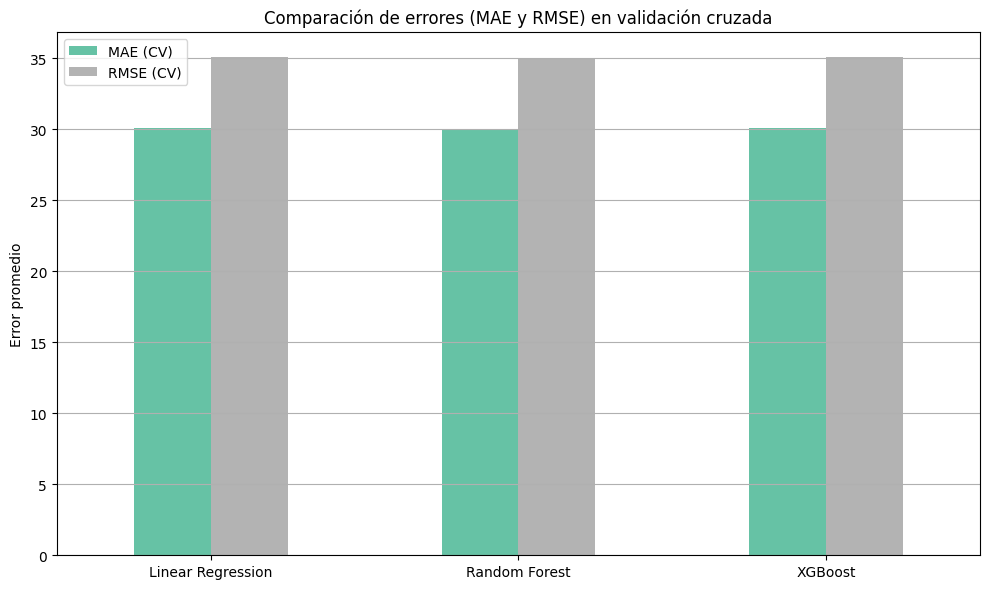

C:\Users\HARRISON\AppData\Local\Temp\ipykernel_17544\3205089510.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_resultados.index, y=df_resultados['R² (CV)'], palette='Set3')


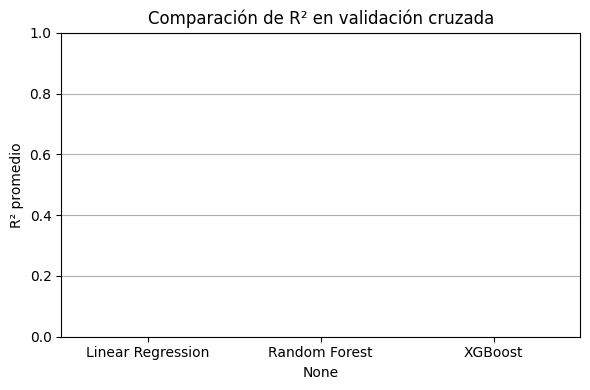

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos con parámetros más ligeros
modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=8, n_jobs=-1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, n_jobs=-1, random_state=42)
}

# Validación cruzada (3 folds)
cv = KFold(n_splits=3, shuffle=True, random_state=42)

resultados = {}

for nombre, modelo in modelos.items():
    print(f"⏳ Evaluando {nombre}...")
    
    mae_scores = -cross_val_score(modelo, X_reg, y_reg, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    rmse_scores = -cross_val_score(modelo, X_reg, y_reg, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    r2_scores = cross_val_score(modelo, X_reg, y_reg, cv=cv, scoring='r2', n_jobs=-1)

    resultados[nombre] = {
        'MAE (CV)': np.mean(mae_scores),
        'RMSE (CV)': np.mean(rmse_scores),
        'R² (CV)': np.mean(r2_scores)
    }

# Mostrar tabla
df_resultados = pd.DataFrame(resultados).T.round(3)
display(df_resultados)

# Gráficas
df_resultados[['MAE (CV)', 'RMSE (CV)']].plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Comparación de errores (MAE y RMSE) en validación cruzada')
plt.ylabel('Error promedio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=df_resultados.index, y=df_resultados['R² (CV)'], palette='Set3')
plt.title('Comparación de R² en validación cruzada')
plt.ylabel('R² promedio')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



## Parte B: Clasificación del Estado del Cáncer

### Objetivo:
Predecir la etapa clínica del cáncer de pulmón (`Stage`) a partir de variables clínicas, demográficas, biomarcadores y comorbilidades.

El modelo debe clasificar a los pacientes en una de las siguientes categorías:
- Stage I
- Stage II
- Stage III
- Stage IV

---

### Modelos de clasificación utilizados:

- **Random Forest Classifier**
- **Support Vector Machine (SVM)**
- **K-Nearest Neighbors (k-NN)**

---

### Métricas de evaluación:

Para evaluar el desempeño de los modelos se utilizaron las siguientes métricas:

- **Accuracy**: proporción total de predicciones correctas.
- **Precision**: proporción de verdaderos positivos entre todos los predichos como positivos (por clase).
- **Recall**: proporción de verdaderos positivos entre todos los casos reales positivos (por clase).
- **F1-score**: medida armónica entre precisión y recall, útil para evaluar el balance entre ambos.

⏳ Evaluando Random Forest...
⏳ Evaluando Logistic Regression...


,Accuracy,Precision,Recall,F1-score
Random Forest,0.297,0.204,0.250,0.146
Logistic Regression,0.292,0.276,0.253,0.188


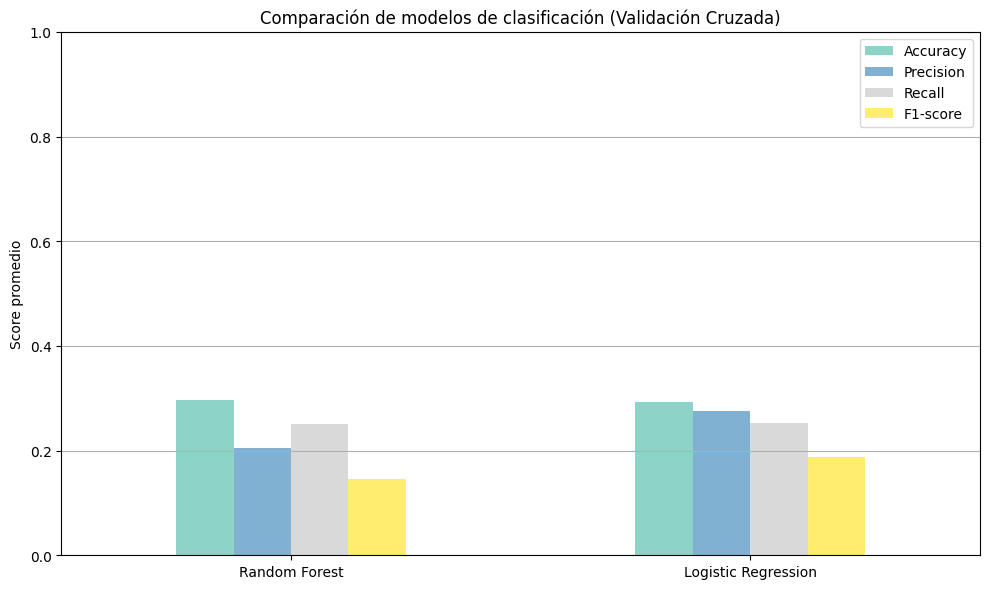

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Opcional: incluir LightGBM si está instalado
try:
    from lightgbm import LGBMClassifier
    use_lgbm = True
except:
    use_lgbm = False

# Modelos a comparar
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
}
if use_lgbm:
    modelos['LightGBM'] = LGBMClassifier(random_state=42)

# Validación cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Diccionario para almacenar resultados
resultados = {}

for nombre, modelo in modelos.items():
    print(f"⏳ Evaluando {nombre}...")

    acc = cross_val_score(modelo, X_clf, y_clf, cv=cv, scoring='accuracy', n_jobs=-1)
    f1 = cross_val_score(modelo, X_clf, y_clf, cv=cv, scoring='f1_macro', n_jobs=-1)
    prec = cross_val_score(modelo, X_clf, y_clf, cv=cv, scoring='precision_macro', n_jobs=-1)
    recall = cross_val_score(modelo, X_clf, y_clf, cv=cv, scoring='recall_macro', n_jobs=-1)

    resultados[nombre] = {
        'Accuracy': np.mean(acc),
        'Precision': np.mean(prec),
        'Recall': np.mean(recall),
        'F1-score': np.mean(f1)
    }

# Mostrar tabla resumen
df_resultados = pd.DataFrame(resultados).T.round(3)
display(df_resultados)

# Visualización
df_resultados.plot(kind='bar', figsize=(10,6), colormap='Set3')
plt.title('Comparación de modelos de clasificación (Validación Cruzada)')
plt.ylabel('Score promedio')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

